# K-NN

In [1]:
import pandas as pd

## I. Chuẩn bị dữ liệu

In [2]:
df = pd.read_csv('../Dataset/archive/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
X = df.drop(['Attrition', 'EmployeeNumber'], axis=1)
y = df['Attrition']

In [5]:
print(f'Số bản ghi dữ liệu: {len(X)}')
print(f'Số cột dữ liệu (tập X): {len(X.columns)}')

Số bản ghi dữ liệu: 1470
Số cột dữ liệu (tập X): 33


In [6]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,Male,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,3,Male,...,3,80,1,17,3,3,5,2,0,3
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,4,Male,...,1,80,1,9,5,3,7,7,1,7
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2,Male,...,2,80,1,6,0,3,6,2,0,3
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,1,4,Male,...,4,80,0,17,3,2,9,6,0,8


In [7]:
y

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

## II. One Hot Encoding và Label Encoding

In [8]:
X_origin = X.copy()
y_origin = y.copy()

In [9]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# define model encoding
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
label_encoder = LabelEncoder()

In [10]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Giả sử X_origin là DataFrame ban đầu
encode_cols = [
    'BusinessTravel', 'Department', 'Education', 'EducationField',
    'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
    'JobRole', 'JobSatisfaction', 'MaritalStatus', 'Over18', 'OverTime',
    'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
    'WorkLifeBalance'
]
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# fit chuyển đổi luôn
X_encoded_array = one_hot_encoder.fit_transform(X_origin[encode_cols])

# Lấy tên cột mới sau khi mã hóa
encoded_columns = one_hot_encoder.get_feature_names_out(encode_cols)

# Tạo DataFrame từ mảng mã hóa
X_encoded_df = pd.DataFrame(X_encoded_array, columns=encoded_columns, index=X_origin.index)

# Gộp với phần dữ liệu còn lại
X_encode = pd.concat([X_origin.drop(columns=encode_cols), X_encoded_df], axis=1)

In [11]:
X_encode

,Age,DailyRate,DistanceFromHome,EmployeeCount,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,41,1102,1,1,94,5993,19479,8,11,80,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,49,279,8,1,61,5130,24907,1,23,80,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,37,1373,2,1,92,2090,2396,6,15,80,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,33,1392,3,1,56,2909,23159,1,11,80,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,27,591,2,1,40,3468,16632,9,12,80,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,1,41,2571,12290,4,17,80,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,39,613,6,1,42,9991,21457,4,15,80,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,27,155,4,1,87,6142,5174,1,20,80,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,49,1023,2,1,63,5390,13243,2,14,80,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [12]:
y_encode = label_encoder.fit_transform(y_origin)

In [13]:
y_encode

array([1, 0, 1, ..., 0, 0, 0], shape=(1470,))

## III. Tự định nghĩa Class, Function

In [14]:
import numpy as np
import warnings

warnings.filterwarnings('ignore')

class KNNClassifier:
    def __init__(self, n_neighbors):
        self.k = n_neighbors

    def fit(self, X_train, y_train):
        self.X_train = X_train
        # Đảm bảo y_train là mảng 1D
        if y_train.ndim > 1:
             # Cố gắng sửa lỗi y_train là ma trận 2D
             self.y_train = y_train.flatten()
        else:
             self.y_train = y_train

    def _predict_single(self, x_test_sample):
        # Tính khoảng cách di từ x đến các xi trong tập Training
        distances = np.linalg.norm(self.X_train - x_test_sample, axis=1)

        # Tìm ra K chỉ số của các phần tử xi
        k_indices = np.argsort(distances)[:self.k]

        # Lấy các nhãn (y) tương ứng
        k_neighbor_labels = self.y_train[k_indices]

        # Lấy đầu ra dự đoán (tính trung bình và so sánh 0.5)
        y_pred_avg = np.mean(k_neighbor_labels)

        if (y_pred_avg >= 0.5):
            return 1
        else:
            return 0

    def predict(self, X_test):
        # Với mỗi x – unseen ở đầu vào (các phần tử trong tập Validation)
        try:
            y_preds = [self._predict_single(x) for x in X_test]
            return np.array(y_preds)
        except ValueError as e:
            # Bắt lỗi nếu X_test và X_train có số cột (features) không khớp
            print(f"LỖI KHI DỰ ĐOÁN: Số chiều không khớp. Lỗi: {e}")
            print(f"Shape X_train: {self.X_train.shape}, Shape X_test[0]: {X_test[0].shape}")
            return None
        except Exception as e:
            print(f"LỖI KHÔNG XÁC ĐỊNH: {e}")
            return None

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def fit_and_evaluate(model, X_train, y_train, X_test, y_test, description):
    print("="*60)
    print(f"ĐANG HUẤN LUYỆN: {description}")

    try:
        # Huấn luyện mô hình
        model.fit(X_train, y_train)

        # Dự đoán trên tập test (tính khoảng cách và lấy trung bình)
        y_pred = model.predict(X_test)

        if y_pred is not None:
            # In kết quả
            print(f"Độ chính xác (Accuracy): {accuracy_score(y_test, y_pred):.4f}")
            print("\nBáo cáo phân loại:\n", classification_report(y_test, y_pred, zero_division=0))
            print("\nMa trận nhầm lẫn:\n", confusion_matrix(y_test, y_pred))

    except Exception as e:
        print(f"!!! GẶP LỖI: {e} !!!")

    print("="*60 + "\n")

## IV. Xây dựng mô hình

### 1. Thực hiện với dữ liệu gốc

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_copy_encode = X_encode.copy()
y_copy_encode = y_encode.copy()

In [17]:
X_train_origin_t1, X_test_origin_t1, y_train_origin_t1, y_test_origin_t1 = train_test_split(
    X_encode, y_encode, test_size=0.2, random_state=42
)

X_train_origin_t2, X_test_origin_t2, y_train_origin_t2, y_test_origin_t2 = train_test_split(
    X_encode, y_encode, test_size=0.3, random_state=42
)

X_train_origin_t3, X_test_origin_t3, y_train_origin_t3, y_test_origin_t3 = train_test_split(
    X_encode, y_encode, test_size=0.4, random_state=42
)

#### 1.1. KNN (Numpy thuần)

In [18]:
knn_model = KNNClassifier(n_neighbors=5)
scaler = StandardScaler()

In [19]:
X_train_origin_t1_std = scaler.fit_transform(X_train_origin_t1)
X_test_origin_t1_std = scaler.transform(X_test_origin_t1)

fit_and_evaluate(knn_model, X_train_origin_t1_std, y_train_origin_t1, X_test_origin_t1_std, y_test_origin_t1, "KNN (Numpy thuần) trên dữ liệu gốc đã chuẩn hóa (train/test: 4/1)")

ĐANG HUẤN LUYỆN: KNN (Numpy thuần) trên dữ liệu gốc đã chuẩn hóa (train/test: 4/1)
Độ chính xác (Accuracy): 0.8776

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.67      0.15      0.25        39

    accuracy                           0.88       294
   macro avg       0.78      0.57      0.59       294
weighted avg       0.86      0.88      0.84       294


Ma trận nhầm lẫn:
 [[252   3]
 [ 33   6]]



In [20]:
X_train_origin_t2_std = scaler.fit_transform(X_train_origin_t2)
X_test_origin_t2_std = scaler.transform(X_test_origin_t2)

fit_and_evaluate(knn_model, X_train_origin_t2_std, y_train_origin_t2, X_test_origin_t2_std, y_test_origin_t2, "KNN (Numpy thuần) trên dữ liệu gốc đã chuẩn hóa (train/test: 7/3)")

ĐANG HUẤN LUYỆN: KNN (Numpy thuần) trên dữ liệu gốc đã chuẩn hóa (train/test: 7/3)
Độ chính xác (Accuracy): 0.8707

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       380
           1       0.61      0.18      0.28        61

    accuracy                           0.87       441
   macro avg       0.75      0.58      0.60       441
weighted avg       0.84      0.87      0.84       441


Ma trận nhầm lẫn:
 [[373   7]
 [ 50  11]]



In [21]:
X_train_origin_t3_std = scaler.fit_transform(X_train_origin_t3)
X_test_origin_t3_std = scaler.transform(X_test_origin_t3)

fit_and_evaluate(knn_model, X_train_origin_t3_std, y_train_origin_t3, X_test_origin_t3_std, y_test_origin_t3, "KNN (Numpy thuần) trên dữ liệu gốc đã chuẩn hóa (train/test: 6/4)")

ĐANG HUẤN LUYỆN: KNN (Numpy thuần) trên dữ liệu gốc đã chuẩn hóa (train/test: 6/4)
Độ chính xác (Accuracy): 0.8741

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       507
           1       0.64      0.20      0.30        81

    accuracy                           0.87       588
   macro avg       0.76      0.59      0.62       588
weighted avg       0.85      0.87      0.84       588


Ma trận nhầm lẫn:
 [[498   9]
 [ 65  16]]



#### 1.2. KNN (Thư viện)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn_lib = KNeighborsClassifier(n_neighbors=5)
scaler = StandardScaler()

In [23]:
X_train_origin_t1_std = scaler.fit_transform(X_train_origin_t1)
X_test_origin_t1_std = scaler.transform(X_test_origin_t1)

fit_and_evaluate(knn_lib, X_train_origin_t1_std, y_train_origin_t1, X_test_origin_t1_std, y_test_origin_t1, "KNN (Thư viện) trên dữ liệu gốc đã chuẩn hóa (train/test: 4/1)")

ĐANG HUẤN LUYỆN: KNN (Thư viện) trên dữ liệu gốc đã chuẩn hóa (train/test: 4/1)
Độ chính xác (Accuracy): 0.8776

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.67      0.15      0.25        39

    accuracy                           0.88       294
   macro avg       0.78      0.57      0.59       294
weighted avg       0.86      0.88      0.84       294


Ma trận nhầm lẫn:
 [[252   3]
 [ 33   6]]



In [24]:
X_train_origin_t2_std = scaler.fit_transform(X_train_origin_t2)
X_test_origin_t2_std = scaler.transform(X_test_origin_t2)

fit_and_evaluate(knn_lib, X_train_origin_t2_std, y_train_origin_t2, X_test_origin_t2_std, y_test_origin_t2, "KNN (Thư viện) trên dữ liệu gốc đã chuẩn hóa (train/test: 7/3)")

ĐANG HUẤN LUYỆN: KNN (Thư viện) trên dữ liệu gốc đã chuẩn hóa (train/test: 7/3)
Độ chính xác (Accuracy): 0.8707

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       380
           1       0.61      0.18      0.28        61

    accuracy                           0.87       441
   macro avg       0.75      0.58      0.60       441
weighted avg       0.84      0.87      0.84       441


Ma trận nhầm lẫn:
 [[373   7]
 [ 50  11]]



In [25]:
X_train_origin_t3_std = scaler.fit_transform(X_train_origin_t3)
X_test_origin_t3_std = scaler.transform(X_test_origin_t3)

fit_and_evaluate(knn_lib, X_train_origin_t3_std, y_train_origin_t3, X_test_origin_t3_std, y_test_origin_t3, "KNN (Thư viện) trên dữ liệu gốc đã chuẩn hóa (train/test: 6/4)")

ĐANG HUẤN LUYỆN: KNN (Thư viện) trên dữ liệu gốc đã chuẩn hóa (train/test: 6/4)
Độ chính xác (Accuracy): 0.8741

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       507
           1       0.64      0.20      0.30        81

    accuracy                           0.87       588
   macro avg       0.76      0.59      0.62       588
weighted avg       0.85      0.87      0.84       588


Ma trận nhầm lẫn:
 [[498   9]
 [ 65  16]]



#### 1.3. Nhận xét

- Kết quả của mô hình KNN bằng Numpy và mô hình KNN của thư viện (Scikit-learn) là giống hệt nhau ở cả 3 tỷ lệ chia.

     - Split 4/1: Cả hai đều có Accuracy 0.8776, ma trận nhầm lẫn [[252, 3], [33, 6]].

     - Split 7/3: Cả hai đều có Accuracy 0.8707, ma trận nhầm lẫn [[373, 7], [50, 11]].

     - Split 6/4: Cả hai đều có Accuracy 0.8741, ma trận nhầm lẫn [[498, 9], [65, 16]].

- Cả 3 tỷ lệ chia (4/1, 7/3, 6/4) đều cho thấy mô hình đang có 1 vài vấn đề:

    - Chỉ số Accuracy (87-88%) rất cao và gây hiểu nhầm.

    - Mô hình dự đoán Lớp 0 (Ở lại) cực kỳ tốt, với Recall gần như tuyệt đối (0.98 - 0.99).

    - Mô hình dự đoán Lớp 1 (Nghỉ việc) cực kỳ tệ, với Recall rất thấp (chỉ từ 0.15 đến 0.20).

- Phân tích Ma trận nhầm lẫn (Ví dụ split 7/3): Ma trận [[373, 7], [50, 11]] cho thấy:

    - Thực tế có 61 người nghỉ việc (hàng 2: 50 + 11).

    - Mô hình đã bỏ sót 50 người (dự đoán sai họ "Ở lại").

    - Mô hình chỉ bắt đúng 11 người (dự đoán đúng là "Nghỉ việc").

Đánh giá: Mô hình này thất bại trong nhiệm vụ quan trọng nhất là "phát hiện nhân viên nghỉ việc". Nó quá thiên vị lớp đa số (Lớp 0) và gần như bỏ qua lớp thiểu số (Lớp 1). Chỉ số macro avg f1-score (chỉ ~0.60) mới phản ánh đúng hiệu suất "tầm thường" của mô hình.

Đây không phải là overfit. Vấn đề của mô hình là làm tệ trên cả train và test đối với Lớp 1. Lý do là vì Dữ liệu mất cân bằng (Imbalanced Data) (khoảng 84% là Lớp 0). Mô hình đã học được rằng cách "an toàn" nhất để có Accuracy cao là luôn dự đoán Lớp 0.

### 2. Thực hiện với dữ liệu đã giảm chiều

#### 2.1. Giảm chiều sử dụng PCA

In [26]:
# Lấy data
X_pca = X_encode.copy()
y_pca = y_encode.copy()

In [27]:
# Chia train/test
from sklearn.model_selection import train_test_split

X_train_t1_pca, X_test_t1_pca, y_train_t1_pca, y_test_t1_pca = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)
X_train_t2_pca, X_test_t2_pca, y_train_t2_pca, y_test_t2_pca = train_test_split(X_pca, y_pca, test_size=0.3, random_state=42)
X_train_t3_pca, X_test_t3_pca, y_train_t3_pca, y_test_t3_pca = train_test_split(X_pca, y_pca, test_size=0.4, random_state=42)

In [28]:
# Chuẩn hóa
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_t1_pca_std = scaler.fit_transform(X_train_t1_pca)
X_test_t1_pca_std = scaler.transform(X_test_t1_pca)

X_train_t2_pca_std = scaler.fit_transform(X_train_t2_pca)
X_test_t2_pca_std = scaler.transform(X_test_t2_pca)

X_train_t3_pca_std = scaler.fit_transform(X_train_t3_pca)
X_test_t3_pca_std = scaler.transform(X_test_t3_pca)

In [29]:
# Giảm chiều
from sklearn.decomposition import PCA

pca_n6 = PCA(n_components=6)

X_train_t1_after_pca_n6_std = pca_n6.fit_transform(X_train_t1_pca_std)
X_test_t1_after_pca_n6_std = pca_n6.transform(X_test_t1_pca_std)

X_train_t2_after_pca_n6_std = pca_n6.fit_transform(X_train_t2_pca_std)
X_test_t2_after_pca_n6_std = pca_n6.transform(X_test_t2_pca_std)

X_train_t3_after_pca_n6_std = pca_n6.fit_transform(X_train_t3_pca_std)
X_test_t3_after_pca_n6_std = pca_n6.transform(X_test_t3_pca_std)

##### 2.1.1. KNN (Numpy thuần)

In [30]:
knn_model = KNNClassifier(n_neighbors=5)

In [31]:
fit_and_evaluate(knn_model, X_train_t1_after_pca_n6_std, y_train_t1_pca, X_test_t1_after_pca_n6_std, y_test_t1_pca, "KNN (Numpy thuần) - PCA n=6 đã chuẩn hóa (train/test: 4/1)")

ĐANG HUẤN LUYỆN: KNN (Numpy thuần) - PCA n=6 đã chuẩn hóa (train/test: 4/1)
Độ chính xác (Accuracy): 0.8197

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       255
           1       0.21      0.13      0.16        39

    accuracy                           0.82       294
   macro avg       0.54      0.53      0.53       294
weighted avg       0.79      0.82      0.80       294


Ma trận nhầm lẫn:
 [[236  19]
 [ 34   5]]



In [32]:
fit_and_evaluate(knn_model, X_train_t2_after_pca_n6_std, y_train_t2_pca, X_test_t2_after_pca_n6_std, y_test_t2_pca, "KNN (Numpy thuần) - PCA n=6 đã chuẩn hóa (train/test: 7/3)")

ĐANG HUẤN LUYỆN: KNN (Numpy thuần) - PCA n=6 đã chuẩn hóa (train/test: 7/3)
Độ chính xác (Accuracy): 0.8367

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91       380
           1       0.36      0.23      0.28        61

    accuracy                           0.84       441
   macro avg       0.62      0.58      0.59       441
weighted avg       0.81      0.84      0.82       441


Ma trận nhầm lẫn:
 [[355  25]
 [ 47  14]]



In [33]:
fit_and_evaluate(knn_model, X_train_t3_after_pca_n6_std, y_train_t3_pca, X_test_t3_after_pca_n6_std, y_test_t3_pca, "KNN (Numpy thuần) - PCA n=6 đã chuẩn hóa (train/test: 6/4)")

ĐANG HUẤN LUYỆN: KNN (Numpy thuần) - PCA n=6 đã chuẩn hóa (train/test: 6/4)
Độ chính xác (Accuracy): 0.8418

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       507
           1       0.38      0.23      0.29        81

    accuracy                           0.84       588
   macro avg       0.63      0.59      0.60       588
weighted avg       0.82      0.84      0.83       588


Ma trận nhầm lẫn:
 [[476  31]
 [ 62  19]]



##### 2.1.2. KNN (Thư viện)

In [34]:
knn_lib = KNeighborsClassifier(n_neighbors=5)

In [35]:
fit_and_evaluate(knn_lib, X_train_t1_after_pca_n6_std, y_train_t1_pca, X_test_t1_after_pca_n6_std, y_test_t1_pca, "KNN (Thư viện) - PCA n=6 đã chuẩn hóa (train/test: 4/1)")

ĐANG HUẤN LUYỆN: KNN (Thư viện) - PCA n=6 đã chuẩn hóa (train/test: 4/1)
Độ chính xác (Accuracy): 0.8197

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       255
           1       0.21      0.13      0.16        39

    accuracy                           0.82       294
   macro avg       0.54      0.53      0.53       294
weighted avg       0.79      0.82      0.80       294


Ma trận nhầm lẫn:
 [[236  19]
 [ 34   5]]



In [36]:
fit_and_evaluate(knn_lib, X_train_t2_after_pca_n6_std, y_train_t2_pca, X_test_t2_after_pca_n6_std, y_test_t2_pca, "KNN (Thư viện) - PCA n=6 đã chuẩn hóa (train/test: 7/3)")

ĐANG HUẤN LUYỆN: KNN (Thư viện) - PCA n=6 đã chuẩn hóa (train/test: 7/3)
Độ chính xác (Accuracy): 0.8367

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91       380
           1       0.36      0.23      0.28        61

    accuracy                           0.84       441
   macro avg       0.62      0.58      0.59       441
weighted avg       0.81      0.84      0.82       441


Ma trận nhầm lẫn:
 [[355  25]
 [ 47  14]]



In [37]:
fit_and_evaluate(knn_lib, X_train_t3_after_pca_n6_std, y_train_t3_pca, X_test_t3_after_pca_n6_std, y_test_t3_pca, "KNN (Thư viện) - PCA n=6 đã chuẩn hóa (train/test: 6/4)")

ĐANG HUẤN LUYỆN: KNN (Thư viện) - PCA n=6 đã chuẩn hóa (train/test: 6/4)
Độ chính xác (Accuracy): 0.8418

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       507
           1       0.38      0.23      0.29        81

    accuracy                           0.84       588
   macro avg       0.63      0.59      0.60       588
weighted avg       0.82      0.84      0.83       588


Ma trận nhầm lẫn:
 [[476  31]
 [ 62  19]]



#### 2.2. Giảm chiều sử dụng LDA

In [38]:
# Lấy data
X_lda = X_encode.copy()
y_lda = y_encode.copy()

In [39]:
# Chia train/test
from sklearn.model_selection import train_test_split

X_train_t1_lda, X_test_t1_lda, y_train_t1_lda, y_test_t1_lda = train_test_split(X_lda, y_lda, test_size=0.2, random_state=42)
X_train_t2_lda, X_test_t2_lda, y_train_t2_lda, y_test_t2_lda = train_test_split(X_lda, y_lda, test_size=0.3, random_state=42)
X_train_t3_lda, X_test_t3_lda, y_train_t3_lda, y_test_t3_lda = train_test_split(X_lda, y_lda, test_size=0.4, random_state=42)

In [40]:
# Chuẩn hóa
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_t1_lda_std = scaler.fit_transform(X_train_t1_lda)
X_test_t1_lda_std = scaler.transform(X_test_t1_lda)

X_train_t2_lda_std = scaler.fit_transform(X_train_t2_lda)
X_test_t2_lda_std = scaler.transform(X_test_t2_lda)

X_train_t3_lda_std = scaler.fit_transform(X_train_t3_lda)
X_test_t3_lda_std = scaler.transform(X_test_t3_lda)

In [41]:
# Giảm chiều
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

num_classes = y_origin.value_counts()
number_classes = len(num_classes)

lda = LinearDiscriminantAnalysis(n_components = number_classes - 1)

X_train_t1_after_lda_std = lda.fit_transform(X_train_t1_lda_std, y_train_t1_lda)
X_test_t1_after_lda_std = lda.transform(X_test_t1_lda_std)

X_train_t2_after_lda_std = lda.fit_transform(X_train_t2_lda_std, y_train_t2_lda)
X_test_t2_after_lda_std = lda.transform(X_test_t2_lda_std)

X_train_t3_after_lda_std = lda.fit_transform(X_train_t3_lda_std, y_train_t3_lda)
X_test_t3_after_lda_std = lda.transform(X_test_t3_lda_std)

##### 2.2.1. KNN (Numpy thuần)

In [42]:
knn_model = KNNClassifier(n_neighbors=5)

In [43]:
fit_and_evaluate(knn_model, X_train_t1_after_lda_std, y_train_t1_lda, X_test_t1_after_lda_std, y_test_t1_lda, "KNN (Numpy thuần) - LDA đã chuẩn hóa (train/test: 4/1)")

ĐANG HUẤN LUYỆN: KNN (Numpy thuần) - LDA đã chuẩn hóa (train/test: 4/1)
Độ chính xác (Accuracy): 0.8741

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       255
           1       0.53      0.46      0.49        39

    accuracy                           0.87       294
   macro avg       0.72      0.70      0.71       294
weighted avg       0.87      0.87      0.87       294


Ma trận nhầm lẫn:
 [[239  16]
 [ 21  18]]



In [44]:
fit_and_evaluate(knn_model, X_train_t2_after_lda_std, y_train_t2_lda, X_test_t2_after_lda_std, y_test_t2_lda, "KNN (Numpy thuần) - LDA đã chuẩn hóa (train/test: 7/3)")

ĐANG HUẤN LUYỆN: KNN (Numpy thuần) - LDA đã chuẩn hóa (train/test: 7/3)
Độ chính xác (Accuracy): 0.8571

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92       380
           1       0.48      0.38      0.42        61

    accuracy                           0.86       441
   macro avg       0.69      0.66      0.67       441
weighted avg       0.84      0.86      0.85       441


Ma trận nhầm lẫn:
 [[355  25]
 [ 38  23]]



In [45]:
fit_and_evaluate(knn_model, X_train_t3_after_lda_std, y_train_t3_lda, X_test_t3_after_lda_std, y_test_t3_lda, "KNN (Numpy thuần) - LDA đã chuẩn hóa (train/test: 6/4)")

ĐANG HUẤN LUYỆN: KNN (Numpy thuần) - LDA đã chuẩn hóa (train/test: 6/4)
Độ chính xác (Accuracy): 0.8793

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       507
           1       0.57      0.49      0.53        81

    accuracy                           0.88       588
   macro avg       0.75      0.72      0.73       588
weighted avg       0.87      0.88      0.88       588


Ma trận nhầm lẫn:
 [[477  30]
 [ 41  40]]



##### 2.2.2. KNN (Thư viện)

In [46]:
knn_lib = KNeighborsClassifier(n_neighbors=5)

In [47]:
fit_and_evaluate(knn_lib, X_train_t1_after_lda_std, y_train_t1_lda, X_test_t1_after_lda_std, y_test_t1_lda, "KNN (Thư viện) - LDA đã chuẩn hóa (train/test: 4/1)")

ĐANG HUẤN LUYỆN: KNN (Thư viện) - LDA đã chuẩn hóa (train/test: 4/1)
Độ chính xác (Accuracy): 0.8741

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       255
           1       0.53      0.46      0.49        39

    accuracy                           0.87       294
   macro avg       0.72      0.70      0.71       294
weighted avg       0.87      0.87      0.87       294


Ma trận nhầm lẫn:
 [[239  16]
 [ 21  18]]



In [48]:
fit_and_evaluate(knn_lib, X_train_t2_after_lda_std, y_train_t2_lda, X_test_t2_after_lda_std, y_test_t2_lda, "KNN (Thư viện) - LDA đã chuẩn hóa (train/test: 7/3)")

ĐANG HUẤN LUYỆN: KNN (Thư viện) - LDA đã chuẩn hóa (train/test: 7/3)
Độ chính xác (Accuracy): 0.8571

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92       380
           1       0.48      0.38      0.42        61

    accuracy                           0.86       441
   macro avg       0.69      0.66      0.67       441
weighted avg       0.84      0.86      0.85       441


Ma trận nhầm lẫn:
 [[355  25]
 [ 38  23]]



In [49]:
fit_and_evaluate(knn_lib, X_train_t3_after_lda_std, y_train_t3_lda, X_test_t3_after_lda_std, y_test_t3_lda, "KNN (Thư viện) - LDA đã chuẩn hóa (train/test: 6/4)")

ĐANG HUẤN LUYỆN: KNN (Thư viện) - LDA đã chuẩn hóa (train/test: 6/4)
Độ chính xác (Accuracy): 0.8793

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       507
           1       0.57      0.49      0.53        81

    accuracy                           0.88       588
   macro avg       0.75      0.72      0.73       588
weighted avg       0.87      0.88      0.88       588


Ma trận nhầm lẫn:
 [[477  30]
 [ 41  40]]



#### 2.3. Nhận xét

- So với kết quả của Dữ liệu gốc (81 cột) ở lượt trước (có macro avg f1-score ~ 0.60):

  + Kết quả của PCA n=6 (giảm xuống còn 6 cột) thậm chí còn tệ hơn.

  + Ví dụ ở split 7/3, macro avg f1-score là 0.59, và f1-score của Lớp 1 (Nghỉ việc) chỉ là 0.28.

  + Ma trận nhầm lẫn [[355, 25], [47, 14]] cho thấy mô hình đã bỏ sót 47/61 trường hợp nghỉ việc VÀ còn dự đoán sai 25 trường hợp không nghỉ.
=> Đánh giá: Việc giảm chiều xuống chỉ còn 6 thành phần bằng PCA (một phương pháp không giám sát) đã làm mất quá nhiều thông tin quan trọng cần thiết để phân biệt hai lớp. PCA chỉ quan tâm đến "phương sai" chung, và 6 cột này rõ ràng là không đủ để mô tả bài toán

- Kết quả của LDA vượt trội hơn hẳn so với cả PCA và Dữ liệu gốc.

- Ví dụ ở split 7/3 (kết quả tệ nhất của LDA):

    - macro avg f1-score là 0.67 (so với 0.59 của PCA và 0.60 của Dữ liệu gốc).

    - f1-score của Lớp 1 là 0.42 (so với 0.28 của PCA và ~0.28 của Dữ liệu gốc).

- Ví dụ ở split 6/4 (kết quả tốt nhất của LDA):

    - macro avg f1-score tăng vọt lên 0.73.

    - f1-score của Lớp 1 đạt 0.53.

    - Ma trận nhầm lẫn [[477, 30], [41, 40]] cho thấy một sự cải thiện vượt bậc: Mô hình đã bắt đúng 40 trong số 81 trường hợp (tỷ lệ recall 0.49), và có precision là 0.57.

=> Đánh giá: LDA là phương pháp giảm chiều phù hợp hơn hẳn cho bài toán này.

Do PCA là không giám sát (unsupervised), nó không quan tâm đến nhãn Yes/No. Nó chỉ giữ lại các chiều có phương sai lớn nhất.

Ngược lại, LDA (Linear Discriminant Analysis) là có giám sát (supervised). Mục tiêu của nó chính là tìm ra các chiều mới (1 chiều duy nhất trong bài toán nhị phân này) sao cho độ phân tách giữa hai lớp Yes và No là lớn nhất. LDA đã thành công trong việc "chiếu" dữ liệu 81 chiều xuống 1 chiều duy nhất mà vẫn giữ lại được thông tin quan trọng nhất để phân loại.

Đây không phải là Overfitting.

Cả 3 phương pháp (Dữ liệu gốc, PCA, LDA) đều cho thấy cùng một vấn đề: Mô hình bị thiên vị (biased) và học chưa tới (underfitting) đối với Lớp 1.

Lý do vẫn là dữ liệu mất cân bằng (imbalanced data). Mặc dù LDA đã cải thiện đáng kể kết quả (vì nó tập trung vào việc tách lớp), nó vẫn chưa thể giải quyết triệt để vấn đề là có quá ít mẫu Lớp 1 để học.

"Hiệu chỉnh" (regularization) cho KNN chính là việc chọn ra K tối ưu. Việc này giúp cân bằng giữa Bias và Variance.

=> Biện pháp cải thiện (Giải quyết gốc rễ vấn đề)

- Kết hợp LDA + SMOTE:

    - Chia X_train_full, X_test_full, y_train_full, y_test_full.

    - fit LDA trên X_train_full, y_train_full.

    - transform X_train_full để tạo ra X_train_lda.

    - transform X_test_full để tạo ra X_test_lda.

    - Áp dụng SMOTE chỉ lên X_train_lda và y_train_full để tạo ra X_train_resampled và y_train_resampled đã cân bằng.

    - Huấn luyện KNN (với K tối ưu) trên (X_train_resampled, y_train_resampled).

    - Đánh giá trên (X_test_lda, y_test_full).

## V. Trực quan

In [50]:
from matplotlib import pyplot as plt


def helper_and_plot(X_train, X_test, y_train, y_test, model = None, command = 'Default command', reduce_name = None, n_components = 2):
    from sklearn.metrics import accuracy_score, confusion_matrix
    from sklearn.decomposition import PCA
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    import time
    if reduce_name == 'PCA':
        model_rd = PCA(n_components=n_components)
        X_train = model_rd.fit_transform(X_train)
        X_test = model_rd.transform(X_test)
    elif reduce_name == 'LDA':
        model_rd = LinearDiscriminantAnalysis(n_components=n_components)
        X_train = model_rd.fit_transform(X_train, y_train)
        X_test = model_rd.transform(X_test)


    start_time = time.time()
    model.fit(X_train, y_train)
    y_prediction = model.predict(X_test)
    end_time = time.time()
    y_prediction_train = model.predict(X_train)


    def plot_prediction_vs_true(y_pred, y_test, title="So sánh Dự đoán và Thực tế"):
        y_pred = np.array(y_pred).flatten()
        y_test = np.array(y_test).flatten()

        plt.figure(figsize=(6, 4))
        x = np.arange(len(y_test))

        # Điểm đúng và sai
        correct = (y_pred == y_test)

        plt.scatter(x[correct], y_test[correct], color='green', label='Dự đoán đúng', marker='o')
        plt.scatter(x[~correct], y_test[~correct], color='red', label='Dự đoán sai', marker='x')

        plt.title(title, fontsize=14)
        plt.xlabel("Chỉ số mẫu (Index)")
        plt.ylabel("Nhãn (0/1)")
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()

    # def plot_confusion_heatmap(y_pred, y_test, title="Ma trận nhầm lẫn"):
    #     cm = confusion_matrix(y_test, y_pred)
    #     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    #     plt.title(title)
    #     plt.xlabel("Dự đoán")
    #     plt.ylabel("Thực tế")
    #     plt.show()


    print()
    print('=' * 20, command, '=' * 20)
    print(f'X_train: {X_train.shape} X_test: {X_test.shape}')
    print(f'Total time: {end_time - start_time}')
    print(f'Accuracy of model {model.__class__.__name__}: {accuracy_score(y_prediction, y_test)}')
    print(f'Accuracy train of model {model.__class__.__name__}: {accuracy_score(y_prediction_train, y_train)}')
    print(f'Confuse matrix: \n{confusion_matrix(y_test, y_prediction)}')
    print('=' * 20, command, '=' * 20)
    print()

    plot_prediction_vs_true(y_prediction, y_test)

In [51]:
X_copy_encode = X_encode.copy()
y_copy_encode = y_encode.copy()


--- BẮT ĐẦU LUỒNG 1: PCA (n=6) ---
Đang tìm K tối ưu cho dữ liệu PCA...
Giá trị K tốt nhất cho PCA (n=6) là: 5

==================== KNN (K=5) với dữ liệu PCA (n=6) ====================
X_train: (882, 6) X_test: (588, 6)
Total time: 0.003830432891845703
Accuracy of model KNeighborsClassifier: 0.8418367346938775
Accuracy train of model KNeighborsClassifier: 0.8718820861678005
Confuse matrix: 
[[476  31]
 [ 62  19]]
==================== KNN (K=5) với dữ liệu PCA (n=6) ====================



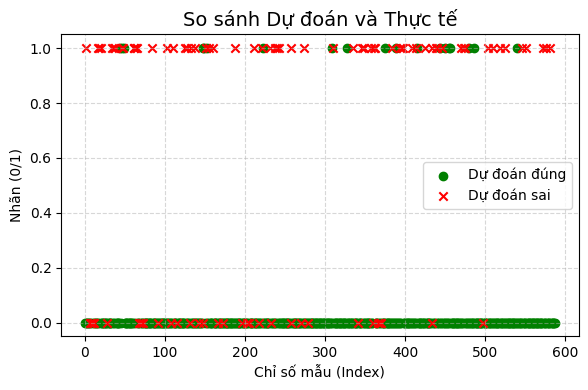


--- BẮT ĐẦU LUỒNG 2: LDA (n=1) ---
Đã giảm chiều xuống 1 cột bằng LDA.
Đang tìm K tối ưu cho dữ liệu LDA...
Giá trị K tốt nhất cho LDA (n=1) là: 17

==================== KNN (K=17) với dữ liệu LDA (n=1) ====================
X_train: (882, 1) X_test: (588, 1)
Total time: 0.003945827484130859
Accuracy of model KNeighborsClassifier: 0.8724489795918368
Accuracy train of model KNeighborsClassifier: 0.9047619047619048
Confuse matrix: 
[[481  26]
 [ 49  32]]
==================== KNN (K=17) với dữ liệu LDA (n=1) ====================



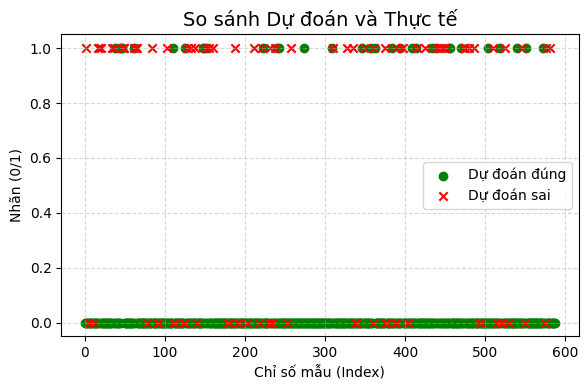

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# --- TÁCH DỮ LIỆU ---
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_copy_encode, y_copy_encode, test_size = 0.4, random_state = 42
)

# --- TIỀN XỬ LÝ (Chuẩn hóa & Giảm chiều) ---
# Chuẩn hóa
scaler = StandardScaler().fit(X_train_val)
X_train_val_std = scaler.transform(X_train_val)
X_test_std = scaler.transform(X_test) # Chuẩn hóa tập test

# LUỒNG 1: PCA (n=6)
print("\n--- BẮT ĐẦU LUỒNG 1: PCA (n=6) ---")

# 1a. Áp dụng PCA
pca = PCA(n_components=6).fit(X_train_val_std)
X_train_pca = pca.transform(X_train_val_std)
X_test_pca = pca.transform(X_test_std)

# 1b. Tìm K tốt nhất cho PCA
print("Đang tìm K tối ưu cho dữ liệu PCA...")
grid_search_pca = GridSearchCV(
    KNeighborsClassifier(),
    {'n_neighbors': list(range(1, 32, 2))},
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1
)
grid_search_pca.fit(X_train_pca, y_train_val)
best_k_pca = grid_search_pca.best_params_['n_neighbors']
print(f"Giá trị K tốt nhất cho PCA (n=6) là: {best_k_pca}")

# 1c. Chạy helper_and_plot với K tốt nhất
helper_and_plot(
    X_train_pca, X_test_pca, y_train_val, y_test,
    model = KNeighborsClassifier(n_neighbors=best_k_pca),
    command = f'KNN (K={best_k_pca}) với dữ liệu PCA (n=6)',
    reduce_name = None # ĐÃ GIẢM CHIỀU RỒI
)

# LUỒNG 2: LDA (n=1)
print("\n--- BẮT ĐẦU LUỒNG 2: LDA (n=1) ---")

# 2a. Áp dụng LDA
# n_components=1 vì đây là bài toán 2 lớp
lda = LinearDiscriminantAnalysis(n_components=1)
# LDA là "có giám sát", nên cần y_train_val khi fit
lda.fit(X_train_val_std, y_train_val)

# Transform cả hai tập
X_train_lda = lda.transform(X_train_val_std)
X_test_lda = lda.transform(X_test_std)
print(f"Đã giảm chiều xuống {X_train_lda.shape[1]} cột bằng LDA.")

# 2b. Tìm K tốt nhất cho LDA
print("Đang tìm K tối ưu cho dữ liệu LDA...")
grid_search_lda = GridSearchCV(
    KNeighborsClassifier(),
    {'n_neighbors': list(range(1, 32, 2))},
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1
)
grid_search_lda.fit(X_train_lda, y_train_val)
best_k_lda = grid_search_lda.best_params_['n_neighbors']
print(f"Giá trị K tốt nhất cho LDA (n=1) là: {best_k_lda}")

# 2c. Chạy helper_and_plot với K tốt nhất
helper_and_plot(
    X_train_lda, X_test_lda, y_train_val, y_test,
    model = KNeighborsClassifier(n_neighbors=best_k_lda),
    command = f'KNN (K={best_k_lda}) với dữ liệu LDA (n=1)',
    reduce_name = None # ĐÃ GIẢM CHIỀU RỒI
)

- Đánh giá mô hình có phù hợp không?
- Nhận định: Mô hình KNN, ngay cả khi kết hợp với LDA, chỉ phù hợp ở mức độ nhất định nhưng chưa phải là mô hình tối ưu cho bài toán này.

=> Mô hình "phù hợp một phần"
- Mô hình thực hiện rất tốt nhiệm vụ dự đoán Lớp 0 (Nhân viên ở lại).

- Chỉ số Accuracy tổng thể cao (gần 88%), cho thấy mô hình đã học được phần lớn dữ liệu (là Lớp 0).

=> Mô hình "chưa tối ưu"

- Mục tiêu của bài toán: Mục tiêu kinh doanh thực tế không phải là tìm ra người ở lại, mà là tìm ra người sắp nghỉ (Lớp 1) để có biện pháp can thiệp.

- Kết quả thực tế: Mô hình thất bại nặng ở mục tiêu này.

=> Nguyên nhân mô hình hoạt động như vậy là do Dữ liệu mất cân bằng (Imbalanced Data).

- Lớp 0 (Ở lại) chiếm tới ~84% dữ liệu.

- Lớp 1 (Nghỉ việc) chỉ chiếm ~16%.

- Do đó, mô hình KNN (một thuật toán dựa trên khoảng cách) bị "thiên vị" (biased). Nó học được rằng cách "an toàn" nhất để đạt được Accuracy cao là cứ dự đoán phần lớn là Lớp 0. Nó không có đủ mẫu Lớp 1 để học và phân biệt một cách hiệu quả.

=> Kết luận: Một mô hình chỉ phù hợp khi nó giải quyết được bài toán kinh doanh. Mặc dù Accuracy 88% nghe có vẻ cao, nhưng một mô hình bỏ sót hơn 50% số ca nghỉ việc là không thể chấp nhận được trong thực tế. Vì vậy, mô hình này là chưa phù hợp.